# Import Package dan Membuat Dataframe

In [1]:
# Import Package
import pandas as pd
import numpy as np

In [5]:
# Membuat Dataframe
Data = pd.DataFrame(
    {
        "Negara" :["Indonesia" ,"Malaysia", "Singapura", "Malaysia", "Thailand", None],
        "A" : [1,2, None, 2,3, None],
        "B" : [5, None, 7, None, None, None],
        "C" : [99, 9, None, 9, 11, None],
        "D" : [12, 8, 14, 8, 15, None]
    }
    )

In [3]:
print("Original Dataset:" )
print(Data)

Original Dataset:
      Negara    A    B     C     D
0  Indonesia  1.0  5.0  99.0  12.0
1   Malaysia  2.0  NaN   9.0   8.0
2  Singapura  NaN  7.0   NaN  14.0
3   Malaysia  2.0  NaN   9.0   8.0
4   Thailand  3.0  NaN  11.0  15.0
5       None  NaN  NaN   NaN   NaN


In [4]:
Data.describe()

,A,B,C,D
count,4.000000,2.000000,4.000000,5.000000
mean,2.000000,6.000000,32.000000,11.400000
std,0.816497,1.414214,44.676616,3.286335
min,1.000000,5.000000,9.000000,8.000000
25%,1.750000,5.500000,9.000000,8.000000
50%,2.000000,6.000000,10.000000,12.000000
75%,2.250000,6.500000,33.000000,14.000000
max,3.000000,7.000000,99.000000,15.000000


#Mencari Missing Value

In [6]:
#Cek missing value di dataset
print("\Missing Value di semua dataset:")
print(Data.isnull().sum())

\Missing Value di semua dataset:
Negara    1
A         2
B         4
C         2
D         1
dtype: int64


In [7]:
#Mengidentisikasi kolom dengan missing value
print("\Mengidentifikasi missing value di tiap kolom:")
print(Data.columns[Data.isnull().any()].tolist())

\Mengidentifikasi missing value di tiap kolom:
['Negara', 'A', 'B', 'C', 'D']


##Memperbaiki Missing Value


In [8]:
drop_row = Data.dropna(how='all')
drop_row

#dropna ini berfungsi untuk menghapus seluruh data yang null semua

,Negara,A,B,C,D
0,Indonesia,1.0,5.0,99.0,12.0
1,Malaysia,2.0,NaN,9.0,8.0
2,Singapura,NaN,7.0,NaN,14.0
3,Malaysia,2.0,NaN,9.0,8.0
4,Thailand,3.0,NaN,11.0,15.0


In [9]:
drop_row2 = Data.dropna(how='any')
drop_row2

#Menghapus semua baris yang ada NaN nya, jadi yang tersisa hanya Indonesia yang datanya lengkap

,Negara,A,B,C,D
0,Indonesia,1.0,5.0,99.0,12.0


In [10]:
drop_row3 = Data.dropna(thresh=4, axis='columns')
drop_row3

#ada thresh artinya, yang data non null nya dibawah 4, itu dihapus semua

,Negara,A,C,D
0,Indonesia,1.0,99.0,12.0
1,Malaysia,2.0,9.0,8.0
2,Singapura,NaN,NaN,14.0
3,Malaysia,2.0,9.0,8.0
4,Thailand,3.0,11.0,15.0
5,None,NaN,NaN,NaN


In [11]:
#Mengganti Data Null/NaN
fill_na = Data.fillna({'A':0, 'B':10, 'C': Data['C'].mean()})
fill_na

#Mengganti kolom A dengan 0, B dengan 10, dan C dengan rata-rata dari kolom C

,Negara,A,B,C,D
0,Indonesia,1.0,5.0,99.0,12.0
1,Malaysia,2.0,10.0,9.0,8.0
2,Singapura,0.0,7.0,32.0,14.0
3,Malaysia,2.0,10.0,9.0,8.0
4,Thailand,3.0,10.0,11.0,15.0
5,None,0.0,10.0,32.0,NaN


### Mengisi Missing Value dengan niai rata-ratanya

In [12]:
#Bekerja pada kolom A
print("\nOriginal Column A:")
print(Data["A"])



Original Column A:
0    1.0
1    2.0
2    NaN
3    2.0
4    3.0
5    NaN
Name: A, dtype: float64


In [14]:
# Mengisi data kosong (NaN) dengan rata-rata data di kolom A
Data_imputed = Data["A"].fillna(Data["A"].mean())
print("\nImputed column A:")
print(Data_imputed)


Imputed column A:
0    1.0
1    2.0
2    2.0
3    2.0
4    3.0
5    2.0
Name: A, dtype: float64


### Mengisi Missing Value dengan data di sebelumnya

In [15]:
#Data asli di kolom B
print("\nData asli kolom B:")
print(Data["B"])


Data asli kolom B:
0    5.0
1    NaN
2    7.0
3    NaN
4    NaN
5    NaN
Name: B, dtype: float64


In [17]:
#Method = "ffill" itu mengisi kolom kosong dengan nilai baris sebelumnya
Data_imputed = Data["B"].fillna(method="ffill")

print("\nPengisian Missing Value:")
print(Data_imputed)


Pengisian Missing Value:
0    5.0
1    5.0
2    7.0
3    7.0
4    7.0
5    7.0
Name: B, dtype: float64


<ipython-input-17-ec01b07b10fb>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Data_imputed = Data["B"].fillna(method="ffill")


In [18]:
#Pengisian missing value dengan data setelah kolom NaN
Data_imputed2 = Data["B"].fillna(method="bfill")

print("\Pengisian Missing Value:")
print(Data_imputed2)

\Pengisian Missing Value:
0    5.0
1    7.0
2    7.0
3    NaN
4    NaN
5    NaN
Name: B, dtype: float64


<ipython-input-18-77ff21a21a1c>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Data_imputed2 = Data["B"].fillna(method="bfill")


Nah di atas itu masih ada NaN, iya karna gak ada kolom atau nilai lagi setelah NaN itu, jadi tetep NaN

### Dengan Menggunakan Interpolasi

In [ ]:
#Dataset sebelum melakukan interpolasi
print("\nDataset sebelum Interpolasi:")
print(Data)


Dataset sebelum Interpolasi:
      Negara    A    B     C     D
0  Indonesia  1.0  5.0  99.0  12.0
1   Malaysia  2.0  NaN   9.0   8.0
2  Singapura  NaN  7.0   NaN  14.0
3   Malaysia  2.0  NaN   9.0   8.0
4   Thailand  3.0  NaN  11.0  15.0
5       None  NaN  NaN   NaN   NaN


In [19]:
#Dataset setelah dilakukan interpolasi
print("\nSetelah interpolasi:")
print(Data.interpolate())


Setelah interpolasi:
      Negara    A    B     C     D
0  Indonesia  1.0  5.0  99.0  12.0
1   Malaysia  2.0  6.0   9.0   8.0
2  Singapura  2.0  7.0   9.0  14.0
3   Malaysia  2.0  7.0   9.0   8.0
4   Thailand  3.0  7.0  11.0  15.0
5       None  3.0  7.0  11.0  15.0


<ipython-input-19-c6fe51ff9985>:3: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  print(Data.interpolate())


- **Interpolasi** adalah teknik mengisi nilai yang hilang (NaN) dengan memperkirakan nilai berdasarkan data di sekitarnya
- Bagaimana interpolasi bekerja? Yaitu menjumlahkan data **di atas** dan **di bawah** nilai NaN, kemudian **dibagi 2**
- Contoh : (5+7)/2 = 12/2=6


## Data Duplicate

In [20]:
#Mengidentifikasi kolom yang duplikat
duplicates = Data.duplicated()

#print kolom duplikat
Data[duplicates]

,Negara,A,B,C,D
3,Malaysia,2.0,NaN,9.0,8.0


### Menghilangkan Data Duplikasi

In [21]:
duplicated_Data = Data.drop_duplicates()

duplicated_Data

,Negara,A,B,C,D
0,Indonesia,1.0,5.0,99.0,12.0
1,Malaysia,2.0,NaN,9.0,8.0
2,Singapura,NaN,7.0,NaN,14.0
4,Thailand,3.0,NaN,11.0,15.0
5,None,NaN,NaN,NaN,NaN


## Typo Data

In [22]:
typo_Data = Data.copy()
typo_Data['Negara'] = typo_Data['Negara'].replace(['Singapura'], 'Singapur')
typo_Data

,Negara,A,B,C,D
0,Indonesia,1.0,5.0,99.0,12.0
1,Malaysia,2.0,NaN,9.0,8.0
2,Singapur,NaN,7.0,NaN,14.0
3,Malaysia,2.0,NaN,9.0,8.0
4,Thailand,3.0,NaN,11.0,15.0
5,None,NaN,NaN,NaN,NaN


In [23]:
typo_Data['Negara'] = typo_Data['Negara'].replace(['Indonesia','Thailand'],['Indonesia','Brunei'])
typo_Data

,Negara,A,B,C,D
0,Indonesia,1.0,5.0,99.0,12.0
1,Malaysia,2.0,NaN,9.0,8.0
2,Singapur,NaN,7.0,NaN,14.0
3,Malaysia,2.0,NaN,9.0,8.0
4,Brunei,3.0,NaN,11.0,15.0
5,None,NaN,NaN,NaN,NaN


##Outlier Data

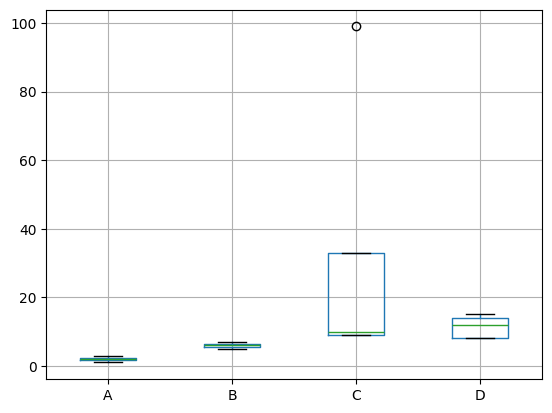

In [24]:
boxplot = Data.boxplot(column=['A','B','C','D'])

- Menampilkan boxplot untuk kolom A, B, C, dan D
- Kolom C mengandung outlier besar, perlu dianalisis lebih lanjut
- Kolom A, B, dan D terlihat lebih stabil, tidak ada outlier yang terlalu signifikan

In [26]:
# Menghapus baris yang seluruhnya NaN
drop_row = Data.dropna(how='all')
drop_row

,Negara,A,B,C,D
0,Indonesia,1.0,5.0,99.0,12.0
1,Malaysia,2.0,NaN,9.0,8.0
2,Singapura,NaN,7.0,NaN,14.0
3,Malaysia,2.0,NaN,9.0,8.0
4,Thailand,3.0,NaN,11.0,15.0


In [27]:
# Mengisi nilai NaN
fill_na = drop_row.fillna({'A':0, 'B':10, 'C':0, 'D':0})
fill_na

,Negara,A,B,C,D
0,Indonesia,1.0,5.0,99.0,12.0
1,Malaysia,2.0,10.0,9.0,8.0
2,Singapura,0.0,7.0,0.0,14.0
3,Malaysia,2.0,10.0,9.0,8.0
4,Thailand,3.0,10.0,11.0,15.0


## Menangani Outlier pada kolom C

In [28]:
#Hitung Quantil 1 dan 3 dari kolom C
Q1 = fill_na['C'].quantile(0.25)
Q3 = fill_na['C'].quantile(0.75)
IQR = Q3-Q1
print(IQR)

2.0


###Rumus Outlier


In [29]:
from re import U
upper_limit = Q3 + 1.5 * IQR #Rumus Menghitung batas atas
lower_limit = Q1 - 1.5 * IQR #Rumus Menghitung batas bawah
print(upper_limit)
print()
print(lower_limit)

14.0

6.0


In [30]:
# Menampilkan baris yang memiliki nilai di kolom C lebih besar dari upper limit
fill_na[fill_na['C'] > upper_limit]

,Negara,A,B,C,D
0,Indonesia,1.0,5.0,99.0,12.0


In [31]:
# Menampilkan baris yang memiliki nilai di kolom C lebih kecil dari lower limit
fill_na[fill_na['C']<lower_limit]

,Negara,A,B,C,D
2,Singapura,0.0,7.0,0.0,14.0


In [33]:
#Menghapus baris yang menyebabkan terjadinya outlier
#Berarti hanya memilih data dari kolom C yang dibawah upper limit saja
new_df = fill_na[fill_na['C'] < upper_limit]
new_df

,Negara,A,B,C,D
1,Malaysia,2.0,10.0,9.0,8.0
2,Singapura,0.0,7.0,0.0,14.0
3,Malaysia,2.0,10.0,9.0,8.0
4,Thailand,3.0,10.0,11.0,15.0


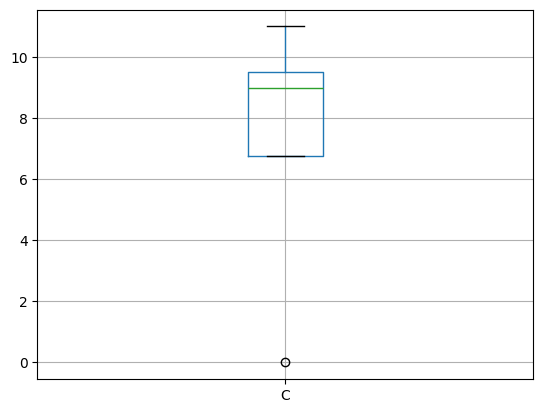

In [34]:
boxplot = new_df.boxplot(column=['C'])

Di atas masih ada outlier

In [36]:
#Mengganti data yang melebihi batas atas dengan nilai batas atas
#mengganti data yang melebihi batas bawah dengan nilai batas bawah

new_df_cap = fill_na.copy()
new_df_cap['C'] = np.where(
    new_df_cap['C'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['C'] < lower_limit,
        lower_limit,
        new_df_cap['C']
    )
)
new_df_cap

,Negara,A,B,C,D
0,Indonesia,1.0,5.0,14.0,12.0
1,Malaysia,2.0,10.0,9.0,8.0
2,Singapura,0.0,7.0,6.0,14.0
3,Malaysia,2.0,10.0,9.0,8.0
4,Thailand,3.0,10.0,11.0,15.0


- Kode ini digunakan untuk mengisi outlier tanpa menghapus data, yaitu dengan mengganti nilai yang melebihi batas atas atau batas bawah dengan nilai batas itu sendiri
- Batas Atas = 14
- Batas Bawah = 6

Outlier di kolom C
- Baris 0 kolom C, nilainya 99. Melebihi batas atas. Diganti dengan batas itu sendiri = Jadi Baris 0 kolom C jadi bernilai 14
- Baris 2 kolom C, nilainya 0, di bawah batas bawah. Diganti jadi batas itu sendiri = Jadi baris 2 kolom C jadi bernilai 6

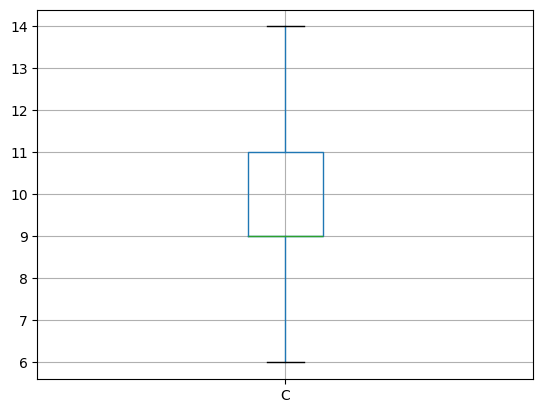

In [37]:
boxplot = new_df_cap.boxplot(column=['C'])

<Axes: >

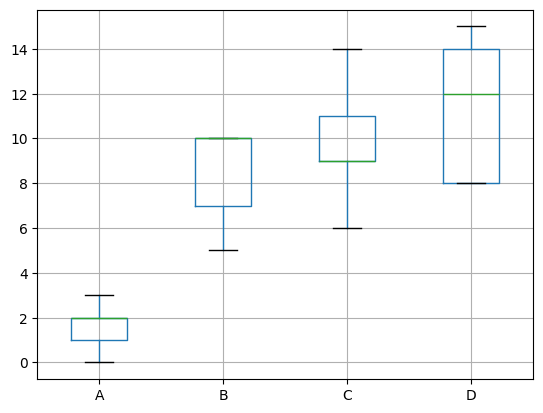

In [38]:
boxplot_all = new_df_cap.boxplot(column=['A','B','C','D'])
boxplot_all